In [1]:
import numpy as np
import qiskit
import qiskit.visualization
from qiskit_aer import AerSimulator

In [2]:
alpha =1/3**0.5
beta = (2/3)**0.5

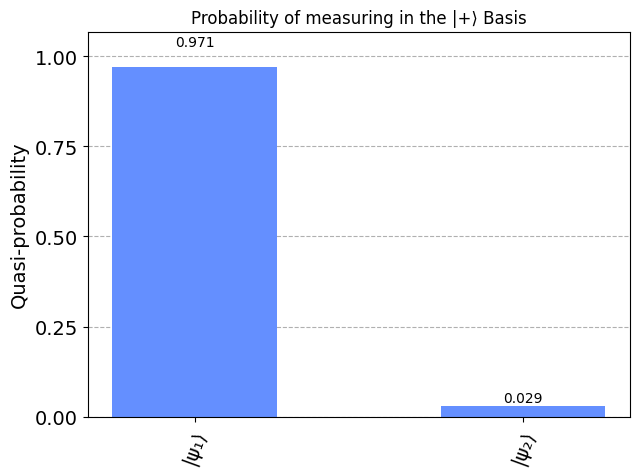

In [16]:
# Define the states psi_1 and psi_2
#in terms of alpha and beta
psi_1 = [alpha, beta]
psi_2 = [beta, -alpha]

# Define the state |+>
plus_state = [1/(2**0.5), 1/(2**0.5)]

# Calculate inner products
inner_product_1 = sum([psi_1[i] * plus_state[i] for i in range(2)])
inner_product_2 = sum([psi_2[i] * plus_state[i] for i in range(2)])

# Calculate probabilities
probability_1 = abs(inner_product_1)**2
probability_2 = abs(inner_product_2)**2

counts={'|ψ₁⟩':probability_1, '|ψ₂⟩':probability_2}

qiskit.visualization.plot_histogram(counts,title='Probability of measuring in the |+⟩ Basis')

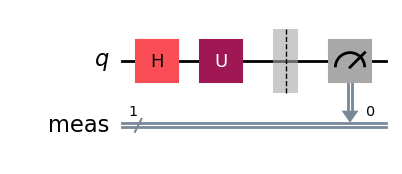

In [6]:
# Create a quantum circuit with 1 qubit
qc = qiskit.QuantumCircuit(1)

# Initialize the qubit to the |+> state
qc.h(0)

# Define the unitary transformation to change basis
unitary_transformation = [[alpha, beta], [beta, -alpha]]

# Apply the unitary transformation to change basis
qc.unitary(unitary_transformation, [0], label='U')

state_vector= qiskit.quantum_info.Statevector(qc)

# Measure the qubit in the computational basis
qc.measure_all()

# Display State Vector
state_vector.draw('latex')

# Draw the circuit diagram
qc.draw("mpl")


0.028916544655929723


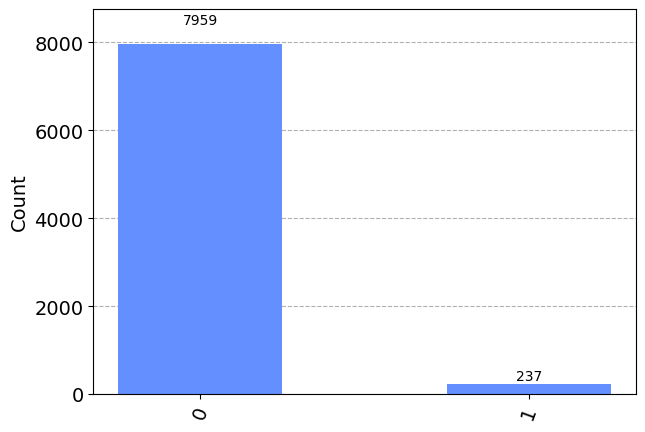

In [15]:
# Simulate the circuit
result = AerSimulator().run(qc, shots=8196, memory=True).result()
counts=result.get_counts()
print(counts['1']/(counts['0']+counts['1']))
qiskit.visualization.plot_histogram(counts)